In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
# Step 2: Load dataset
df = pd.read_csv("/content/manufacturing_dataset_1000_samples.csv")

# Display first few rows
print(df.head())

# Check info
print(df.info())

# Summary statistics
print(df.describe())


             Timestamp  Injection_Temperature  Injection_Pressure  Cycle_Time  \
0  2023-01-01 00:00:00                  221.0               136.0        28.7   
1  2023-01-01 01:00:00                  213.3               128.9        34.5   
2  2023-01-01 02:00:00                  222.8               115.9        19.9   
3  2023-01-01 03:00:00                  233.3               105.3        39.2   
4  2023-01-01 04:00:00                  212.2               125.5        45.0   

   Cooling_Time  Material_Viscosity  Ambient_Temperature  Machine_Age  \
0          13.6               375.5                 28.0          3.8   
1          14.0               215.8                 22.6          6.8   
2           9.5               307.0                 25.3          4.2   
3          13.1               137.8                 26.0          9.2   
4           9.9               298.2                 23.6          6.2   

   Operator_Experience  Maintenance_Hours    Shift Machine_Type  \
0      

In [4]:
# Step 3: Handle missing values

# Fill numerical columns with mean
df['Material_Viscosity'].fillna(df['Material_Viscosity'].mean(), inplace=True)
df['Ambient_Temperature'].fillna(df['Ambient_Temperature'].mean(), inplace=True)
df['Operator_Experience'].fillna(df['Operator_Experience'].mean(), inplace=True)

# Confirm no missing values remain
print(df.isnull().sum())


Timestamp                     0
Injection_Temperature         0
Injection_Pressure            0
Cycle_Time                    0
Cooling_Time                  0
Material_Viscosity            0
Ambient_Temperature           0
Machine_Age                   0
Operator_Experience           0
Maintenance_Hours             0
Shift                         0
Machine_Type                  0
Material_Grade                0
Day_of_Week                   0
Temperature_Pressure_Ratio    0
Total_Cycle_Time              0
Efficiency_Score              0
Machine_Utilization           0
Parts_Per_Hour                0
dtype: int64


/tmp/ipython-input-4120962747.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Material_Viscosity'].fillna(df['Material_Viscosity'].mean(), inplace=True)
/tmp/ipython-input-4120962747.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

In [5]:
# Step 4: Drop Timestamp if exists
if 'Timestamp' in df.columns:
    df.drop('Timestamp', axis=1, inplace=True)

print("Columns after dropping:", df.columns.tolist())


Columns after dropping: ['Injection_Temperature', 'Injection_Pressure', 'Cycle_Time', 'Cooling_Time', 'Material_Viscosity', 'Ambient_Temperature', 'Machine_Age', 'Operator_Experience', 'Maintenance_Hours', 'Shift', 'Machine_Type', 'Material_Grade', 'Day_of_Week', 'Temperature_Pressure_Ratio', 'Total_Cycle_Time', 'Efficiency_Score', 'Machine_Utilization', 'Parts_Per_Hour']


In [6]:
# Step 5: Encode categorical variables
categorical_cols = ['Shift', 'Machine_Type', 'Material_Grade', 'Day_of_Week']

# One-Hot Encoding for categorical features
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("Columns after encoding:", df.columns.tolist())


Columns after encoding: ['Injection_Temperature', 'Injection_Pressure', 'Cycle_Time', 'Cooling_Time', 'Material_Viscosity', 'Ambient_Temperature', 'Machine_Age', 'Operator_Experience', 'Maintenance_Hours', 'Temperature_Pressure_Ratio', 'Total_Cycle_Time', 'Efficiency_Score', 'Machine_Utilization', 'Parts_Per_Hour', 'Shift_Evening', 'Shift_Night', 'Machine_Type_Type_B', 'Machine_Type_Type_C', 'Material_Grade_Premium', 'Material_Grade_Standard', 'Day_of_Week_Monday', 'Day_of_Week_Saturday', 'Day_of_Week_Sunday', 'Day_of_Week_Thursday', 'Day_of_Week_Tuesday', 'Day_of_Week_Wednesday']


In [7]:
# Step 6: Feature scaling (for numerical columns only)
from sklearn.preprocessing import StandardScaler

# Define numerical columns except target
num_cols = [col for col in df.columns if col != 'Parts_Per_Hour']

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

print("Scaled numerical features.")


Scaled numerical features.


In [8]:
# Step 7: Define features and target variable
X = df.drop('Parts_Per_Hour', axis=1)
y = df['Parts_Per_Hour']

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (1000, 25)
Target shape: (1000,)


In [9]:
# Step 8: Split dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)


Training set: (800, 25)
Testing set: (200, 25)


In [10]:
# Step 9: Train Linear Regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print("Model trained successfully!")


Model trained successfully!


In [11]:
# Step 10: Evaluate model performance
y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error (MSE): 12.28
Root Mean Squared Error (RMSE): 3.50
R² Score: 0.91


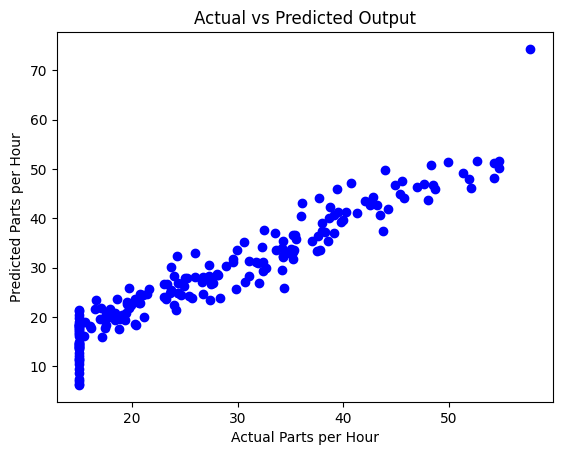

In [12]:
# Step 11: Plot actual vs predicted
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual Parts per Hour")
plt.ylabel("Predicted Parts per Hour")
plt.title("Actual vs Predicted Output")
plt.show()


In [13]:
# Step 12: Check model coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print(coefficients.sort_values(by='Coefficient', ascending=False))


                       Feature  Coefficient
11            Efficiency_Score     3.040667
3                 Cooling_Time     2.699047
0        Injection_Temperature     2.341595
17      Material_Grade_Premium     1.268536
1           Injection_Pressure     1.201110
7          Operator_Experience     0.956129
18     Material_Grade_Standard     0.812342
24       Day_of_Week_Wednesday     0.633802
22        Day_of_Week_Thursday     0.336864
23         Day_of_Week_Tuesday     0.256942
19          Day_of_Week_Monday     0.216968
20        Day_of_Week_Saturday     0.198470
21          Day_of_Week_Sunday     0.046476
8            Maintenance_Hours    -0.065309
5          Ambient_Temperature    -0.121978
12         Machine_Utilization    -0.434639
2                   Cycle_Time    -0.570542
13               Shift_Evening    -0.776952
9   Temperature_Pressure_Ratio    -0.899509
4           Material_Viscosity    -0.941145
15         Machine_Type_Type_B    -1.156259
14                 Shift_Night  

In [14]:
# Step 13: Save the trained model
import joblib

joblib.dump(model, 'linear_regression_model.pkl')
print("Model saved as linear_regression_model.pkl")


Model saved as linear_regression_model.pkl


In [15]:
# Step 14: Create FastAPI app for prediction
from fastapi import FastAPI
import joblib
import numpy as np

app = FastAPI()
model = joblib.load('linear_regression_model.pkl')

@app.get("/")
def home():
    return {"message": "Manufacturing Output Prediction API"}

@app.post("/predict")
def predict(data: list):
    data = np.array(data).reshape(1, -1)
    prediction = model.predict(data)[0]
    return {"Predicted Parts per Hour": float(prediction)}
